In [59]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gc

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

#nltk libraries
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import treebank, wordnet
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.wsd import lesk

In [52]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
#import the 3 datasets

wordmeasure_df = pd.read_csv('wordmeasure_v1.csv', encoding='latin1')
participant_info_df = pd.read_csv('participant info_v1.csv', encoding='latin1')
word_info_df = pd.read_csv('word info_v1.csv', encoding='latin1')

wordmeasure_df.head()

,book,subjectid,textid,eiken,trialid,itemid,ia,skip,nfix,tfd,regin,firstfix.prog,ffd,gd,refix,reread,rpd
0,A,3,1,p2,2,1,Many,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,3,1,p2,2,2,people,0.0,1.0,104.0,0.0,1.0,104.0,104.0,0.0,0.0,104.0
2,A,3,1,p2,2,3,dream,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,3,1,p2,2,4,of,0.0,2.0,342.0,1.0,1.0,95.0,95.0,0.0,1.0,95.0
4,A,3,1,p2,2,5,becoming,0.0,2.0,504.0,0.0,1.0,263.0,504.0,1.0,0.0,504.0


In [4]:
participant_info_df.head()

,ï»¿subjectid,sex,age,book,pro,conf.1,conf.2,conf.3,conf.ave
0,2,M,19,B,19,5,5,4,4.666667
1,3,F,22,A,15,5,5,5,5.000000
2,7,M,23,A,11,2,2,2,2.000000
3,8,F,20,B,9,3,5,3,3.666667
4,9,F,20,A,11,3,3,3,3.000000


In [5]:
word_info_df.head()

,ï»¿textid,itemid,ia,position,length,freq,pun,lmost,rmost
0,1,1,Many,1,4,1.0,0,1,0
1,1,2,people,2,6,1.0,0,0,0
2,1,3,dream,3,5,1.0,0,0,0
3,1,4,of,4,2,1.0,0,0,0
4,1,5,becoming,5,8,1.0,0,0,0


In [6]:
#Remove special character in subjectid-column_name

participant_info_df.columns = participant_info_df.columns.str.replace('ï»¿', '')
participant_info_df.head()

,subjectid,sex,age,book,pro,conf.1,conf.2,conf.3,conf.ave
0,2,M,19,B,19,5,5,4,4.666667
1,3,F,22,A,15,5,5,5,5.000000
2,7,M,23,A,11,2,2,2,2.000000
3,8,F,20,B,9,3,5,3,3.666667
4,9,F,20,A,11,3,3,3,3.000000


In [7]:
#Remove special character in subjectid-column_name

word_info_df.columns = word_info_df.columns.str.replace('ï»¿', '')
word_info_df.head()

,textid,itemid,ia,position,length,freq,pun,lmost,rmost
0,1,1,Many,1,4,1.0,0,1,0
1,1,2,people,2,6,1.0,0,0,0
2,1,3,dream,3,5,1.0,0,0,0
3,1,4,of,4,2,1.0,0,0,0
4,1,5,becoming,5,8,1.0,0,0,0


In [8]:
#table that contains participants data + eye data

participantTable = pd.merge(wordmeasure_df, participant_info_df, on=['subjectid', 'book'], how='left')
participantTable.head()

,book,subjectid,textid,eiken,trialid,itemid,ia,skip,nfix,tfd,...,refix,reread,rpd,sex,age,pro,conf.1,conf.2,conf.3,conf.ave
0,A,3,1,p2,2,1,Many,1.0,0.0,0.0,...,NaN,NaN,NaN,F,22,15,5,5,5,5.0
1,A,3,1,p2,2,2,people,0.0,1.0,104.0,...,0.0,0.0,104.0,F,22,15,5,5,5,5.0
2,A,3,1,p2,2,3,dream,1.0,0.0,0.0,...,NaN,NaN,NaN,F,22,15,5,5,5,5.0
3,A,3,1,p2,2,4,of,0.0,2.0,342.0,...,0.0,1.0,95.0,F,22,15,5,5,5,5.0
4,A,3,1,p2,2,5,becoming,0.0,2.0,504.0,...,1.0,0.0,504.0,F,22,15,5,5,5,5.0


In [9]:
#table that contains the word info/details + participant details

df = pd.merge(participantTable, word_info_df, on=['itemid', 'ia', 'textid'], how='left')
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
book,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
subjectid,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
textid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
eiken,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2
trialid,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
itemid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
ia,Many,people,dream,of,becoming,rich,by,selling,a,new,product.,"However,",it,is,often,difficult,to,start,and,run
skip,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
nfix,0.0,1.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,1.0,1.0
tfd,0.0,104.0,0.0,342.0,504.0,230.0,0.0,508.0,0.0,310.0,265.0,360.0,90.0,103.0,271.0,402.0,0.0,691.0,280.0,206.0


In [10]:
df.to_csv('eye-tracking-dataset.csv', index=False)

##### participants and eye data table were joined together using a left join, where subjectid and book are the primary keys and the combined table were later merged with word info/details table via this same left joining where itemid, ia and textid are primary keys

# Data Exploration

### Column Names labels

##### word_info
textid	- id of the reading passage <br>
itemid - id of the word-token (ia) <br>
ia	- inresting area (word-token) <br>
position - position of the word in a passage (from 1 to the maximum word count of the passage) <br>
length	word - length (number of characters) <br>
freq	word - frequency (from levels 1 to 8 based on the New JACET 8000 List of Basic Words) <br>
pun	- whetehr the word has a punctuation ( e.g., comma, period) <br>
lmost - whether the word was at the left-most edge of the line appearing on the screen <br>
rmost - whether the word was at the right-most edge of the line appearing on the screen

***

##### word_measure
book - material set (A or B) <br>
subjectid - id of the subjects (participants) <br>
textid	- id of the reading passage <br>
eiken - grade of eiken (pre-2nd [p2], 2nd [2], pre-1st [p1]) <br>
trialid	- id of the trial (paragraph in most cases) <br>
itemid	- id of the word-token (ia) <br>
ia	- inresting area (word-token) <br>
skip - a binary index of whether a word was skipped during the first pass <br>
nfix - the total count of fixations on a word **/FIXATION COUNT** <br>
tfd	- the cumulative duration (ms) of all fixations on a word <br>
regin - a binary index indicating whether a word was regressed  from the later parts of the text <br>
ffd	- the duration (ms) of the first fixation on a word during the first pass <br>
gd - the total duration (ms) of fixations on a word during the first pass (also known as first-pass reading time) <br>
refix - a binary index indicating whether a word was fixated on more than once during the first pass <br>
reread - a binary index indicating whether a word was fixated on after the first pass **/REGRESSION** <br>
rpd - the total duration from when a word was first fixated on until the gaze is directed away from the word to the right, including the time spent during regressions from the word  (also known as go-past time) **/FIXATION DURATION**

***

##### participant_info
id - id of the subjects (participants) <br>
sex	- sex of the participants (Male / Female) <br>
age	- age of the participants <br>
book - material set (A /  B) <br>
pro	- score of the reading proficiency test <br>
conf.1 - confidence ratings on general English language proficeincy <br>
conf.2 - confidence ratings on reading comprehension skill in English <br>
conf.3 - confidence ratings on reading speed in English <br>
conf.ave - average confidence ratings

In [10]:
# Get descriptive statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,412583.0,26.780488,13.538601,2.0,15.000000,27.000000,38.000000,51.0
textid,412583.0,15.930836,8.525343,1.0,9.000000,16.000000,23.000000,30.0
trialid,412583.0,79.183345,43.938901,2.0,43.000000,79.000000,117.000000,155.0
itemid,412583.0,5032.000000,2904.941386,1.0,2516.000000,5032.000000,7548.000000,10063.0
skip,411243.0,0.199751,0.399813,0.0,0.000000,0.000000,0.000000,1.0
nfix,411243.0,1.925711,1.921312,0.0,1.000000,1.000000,2.000000,52.0
tfd,411243.0,474.532201,515.088023,0.0,186.000000,337.000000,605.000000,19796.0
regin,351143.0,0.229525,0.420528,0.0,0.000000,0.000000,0.000000,1.0
firstfix.prog,351143.0,0.937216,0.242574,0.0,1.000000,1.000000,1.000000,1.0
ffd,329888.0,260.528531,120.525302,80.0,184.000000,241.000000,311.000000,5592.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412583 entries, 0 to 412582
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   book           412583 non-null  object 
 1   subjectid      412583 non-null  int64  
 2   textid         412583 non-null  int64  
 3   eiken          412583 non-null  object 
 4   trialid        412583 non-null  int64  
 5   itemid         412583 non-null  int64  
 6   ia             412583 non-null  object 
 7   skip           411243 non-null  float64
 8   nfix           411243 non-null  float64
 9   tfd            411243 non-null  float64
 10  regin          351143 non-null  float64
 11  firstfix.prog  351143 non-null  float64
 12  ffd            329888 non-null  float64
 13  gd             329888 non-null  float64
 14  refix          329888 non-null  float64
 15  reread         329888 non-null  float64
 16  rpd            329888 non-null  float64
 17  sex            412583 non-nul

# Data Cleaning

In [12]:
# Check for missing values in the dataset
df.isna().sum()

book                 0
subjectid            0
textid               0
eiken                0
trialid              0
itemid               0
ia                   0
skip              1340
nfix              1340
tfd               1340
regin            61440
firstfix.prog    61440
ffd              82695
gd               82695
refix            82695
reread           82695
rpd              82695
sex                  0
age                  0
pro                  0
conf.1               0
conf.2               0
conf.3               0
conf.ave             0
position          3198
length            3198
freq             30668
pun               3198
lmost             3198
rmost             3198
dtype: int64

<Axes: >

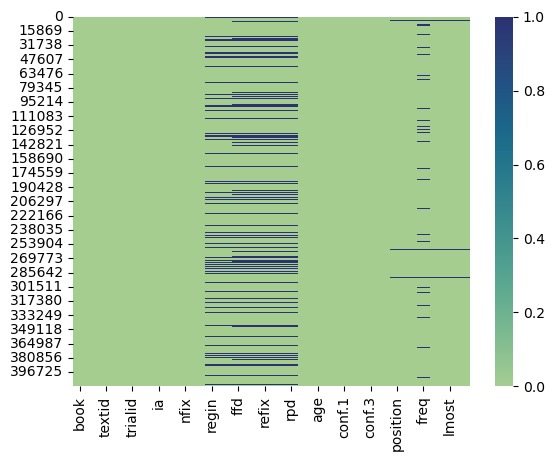

In [13]:
#Visualize missing data in the dataframe using heatmap

sns.heatmap(df.isnull(), cbar=True, cmap='crest')

In [14]:
df['regin'].unique(), df['firstfix.prog'].unique(), df['refix'].unique(), df['reread'].unique()

(array([nan,  0.,  1.]),
 array([nan,  1.,  0.]),
 array([nan,  0.,  1.]),
 array([nan,  0.,  1.]))

In [15]:
"""As a way of addressing the missing values, we can either drop nan values, or perform imputation.
we are going to perform a mode imputation for columns with binary values"""

#sort out columns with binary values
binary_val_cols = ['regin', 'firstfix.prog', 'refix', 'reread', 'skip', 'pun', 'lmost', 'rmost']

for i in binary_val_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)
    
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
book,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
subjectid,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
textid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
eiken,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2,p2
trialid,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
itemid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
ia,Many,people,dream,of,becoming,rich,by,selling,a,new,product.,"However,",it,is,often,difficult,to,start,and,run
skip,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
nfix,0.0,1.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,1.0,1.0
tfd,0.0,104.0,0.0,342.0,504.0,230.0,0.0,508.0,0.0,310.0,265.0,360.0,90.0,103.0,271.0,402.0,0.0,691.0,280.0,206.0


In [16]:
df.isna().sum()

book                 0
subjectid            0
textid               0
eiken                0
trialid              0
itemid               0
ia                   0
skip                 0
nfix              1340
tfd               1340
regin                0
firstfix.prog        0
ffd              82695
gd               82695
refix                0
reread               0
rpd              82695
sex                  0
age                  0
pro                  0
conf.1               0
conf.2               0
conf.3               0
conf.ave             0
position          3198
length            3198
freq             30668
pun                  0
lmost                0
rmost                0
dtype: int64

In [17]:
#The cleaning process - after checking the missing values, replace rows with NaN values with the mean of the column

for i in df.columns:
    if df[i].isna().sum() > 0:
        df[i].fillna(df[i].median(skipna=True), inplace=True)
    

<Axes: >

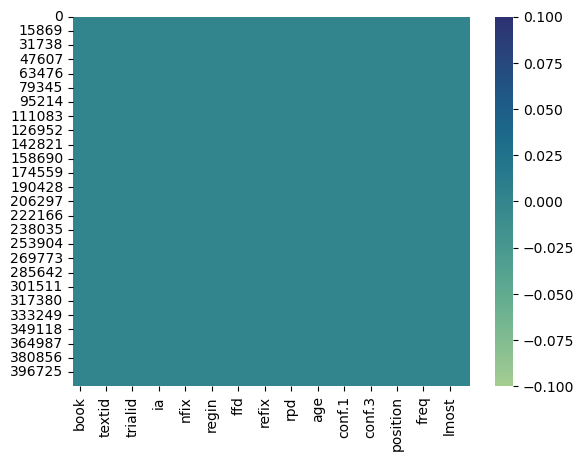

In [18]:
#Again visualize missing data in the dataframe using heatmap

sns.heatmap(df.isnull(), cbar=True, cmap='crest')

# Data Normalization and Standardization

In [28]:
""" The selected features are the most popular features without the benefit of doubt have a correlation with eye tracking dataset.
They were selected to be scaled.... they are mostly of fixation, gaze duration, word length, word frequency, regression. """

# Select numerical features for standardization
features_to_scale = ['length', 'freq', 'nfix', 'tfd', 'ffd', 'gd', 'rpd']

#scaler = StandardScaler()

#df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# [2] Exploratory Data Analysis

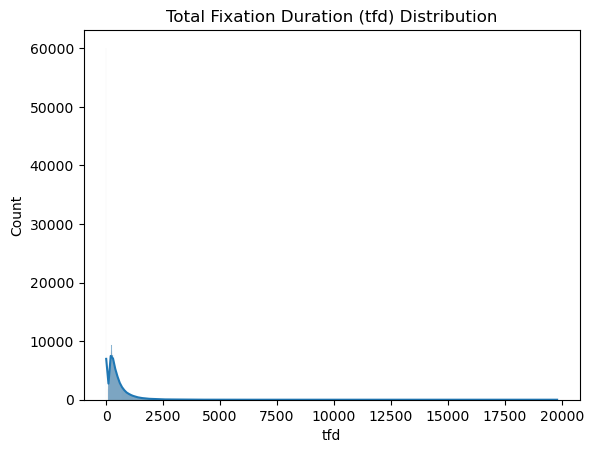

In [29]:
# Fixation duration distribution visualization
sns.histplot(df['tfd'], kde=True)
plt.title('Total Fixation Duration (tfd) Distribution')
plt.show()

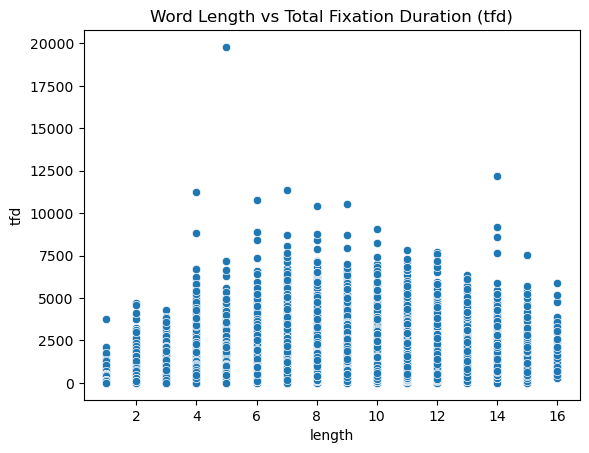

In [30]:
# Relationship between fixation duration and word length
sns.scatterplot(x='length', y='tfd', data=df)
plt.title('Word Length vs Total Fixation Duration (tfd)')
plt.show()

# Correlation Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_20644\3732736560.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

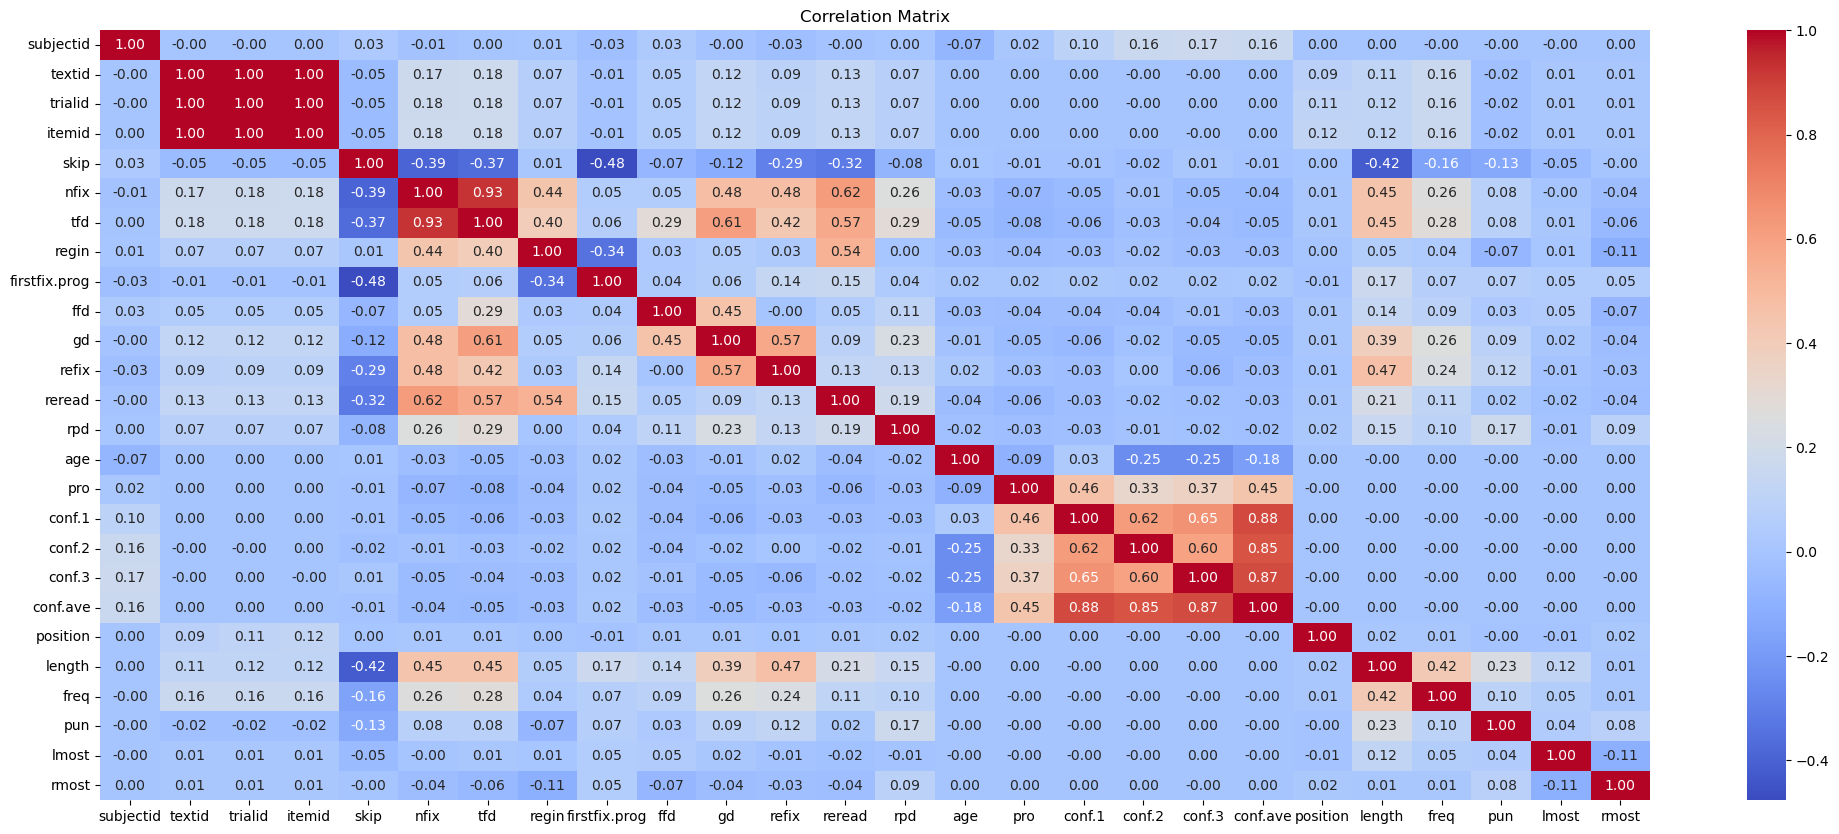

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')


# [3] Feature Engineering

In [32]:
# Example: Creating total fixation time and regression ratio
df['total_fixation_time'] = df['nfix'] * df['tfd']

df['regression_ratio'] = df['reread'] / df['nfix']


In [33]:
# We already have word length and frequency in the dataset, since we haven't decided yet on doing syntactic complexity, we can still create this feature regardless to boost our feature selection options

# Recall, syntactic complexity is all about the structure of the sentence hence, we derive that from word positions and differenciate words that have punctuations(e.g., based on position and punctuation)
df['syntactic_complexity'] = df.apply(lambda x: x['position'] if x['pun'] else 0, axis=1)


In [34]:
#Create new feature to know Word Difficulty Score
df['word_difficulty'] = df['freq'] * df['length']

#Create new Participant Proficiency Score
df['participant_proficiency'] = df['pro'] * df['conf.ave']

### Check for the correlation of new features to the target variable

C:\Users\HP\AppData\Local\Temp\ipykernel_20644\1793163224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

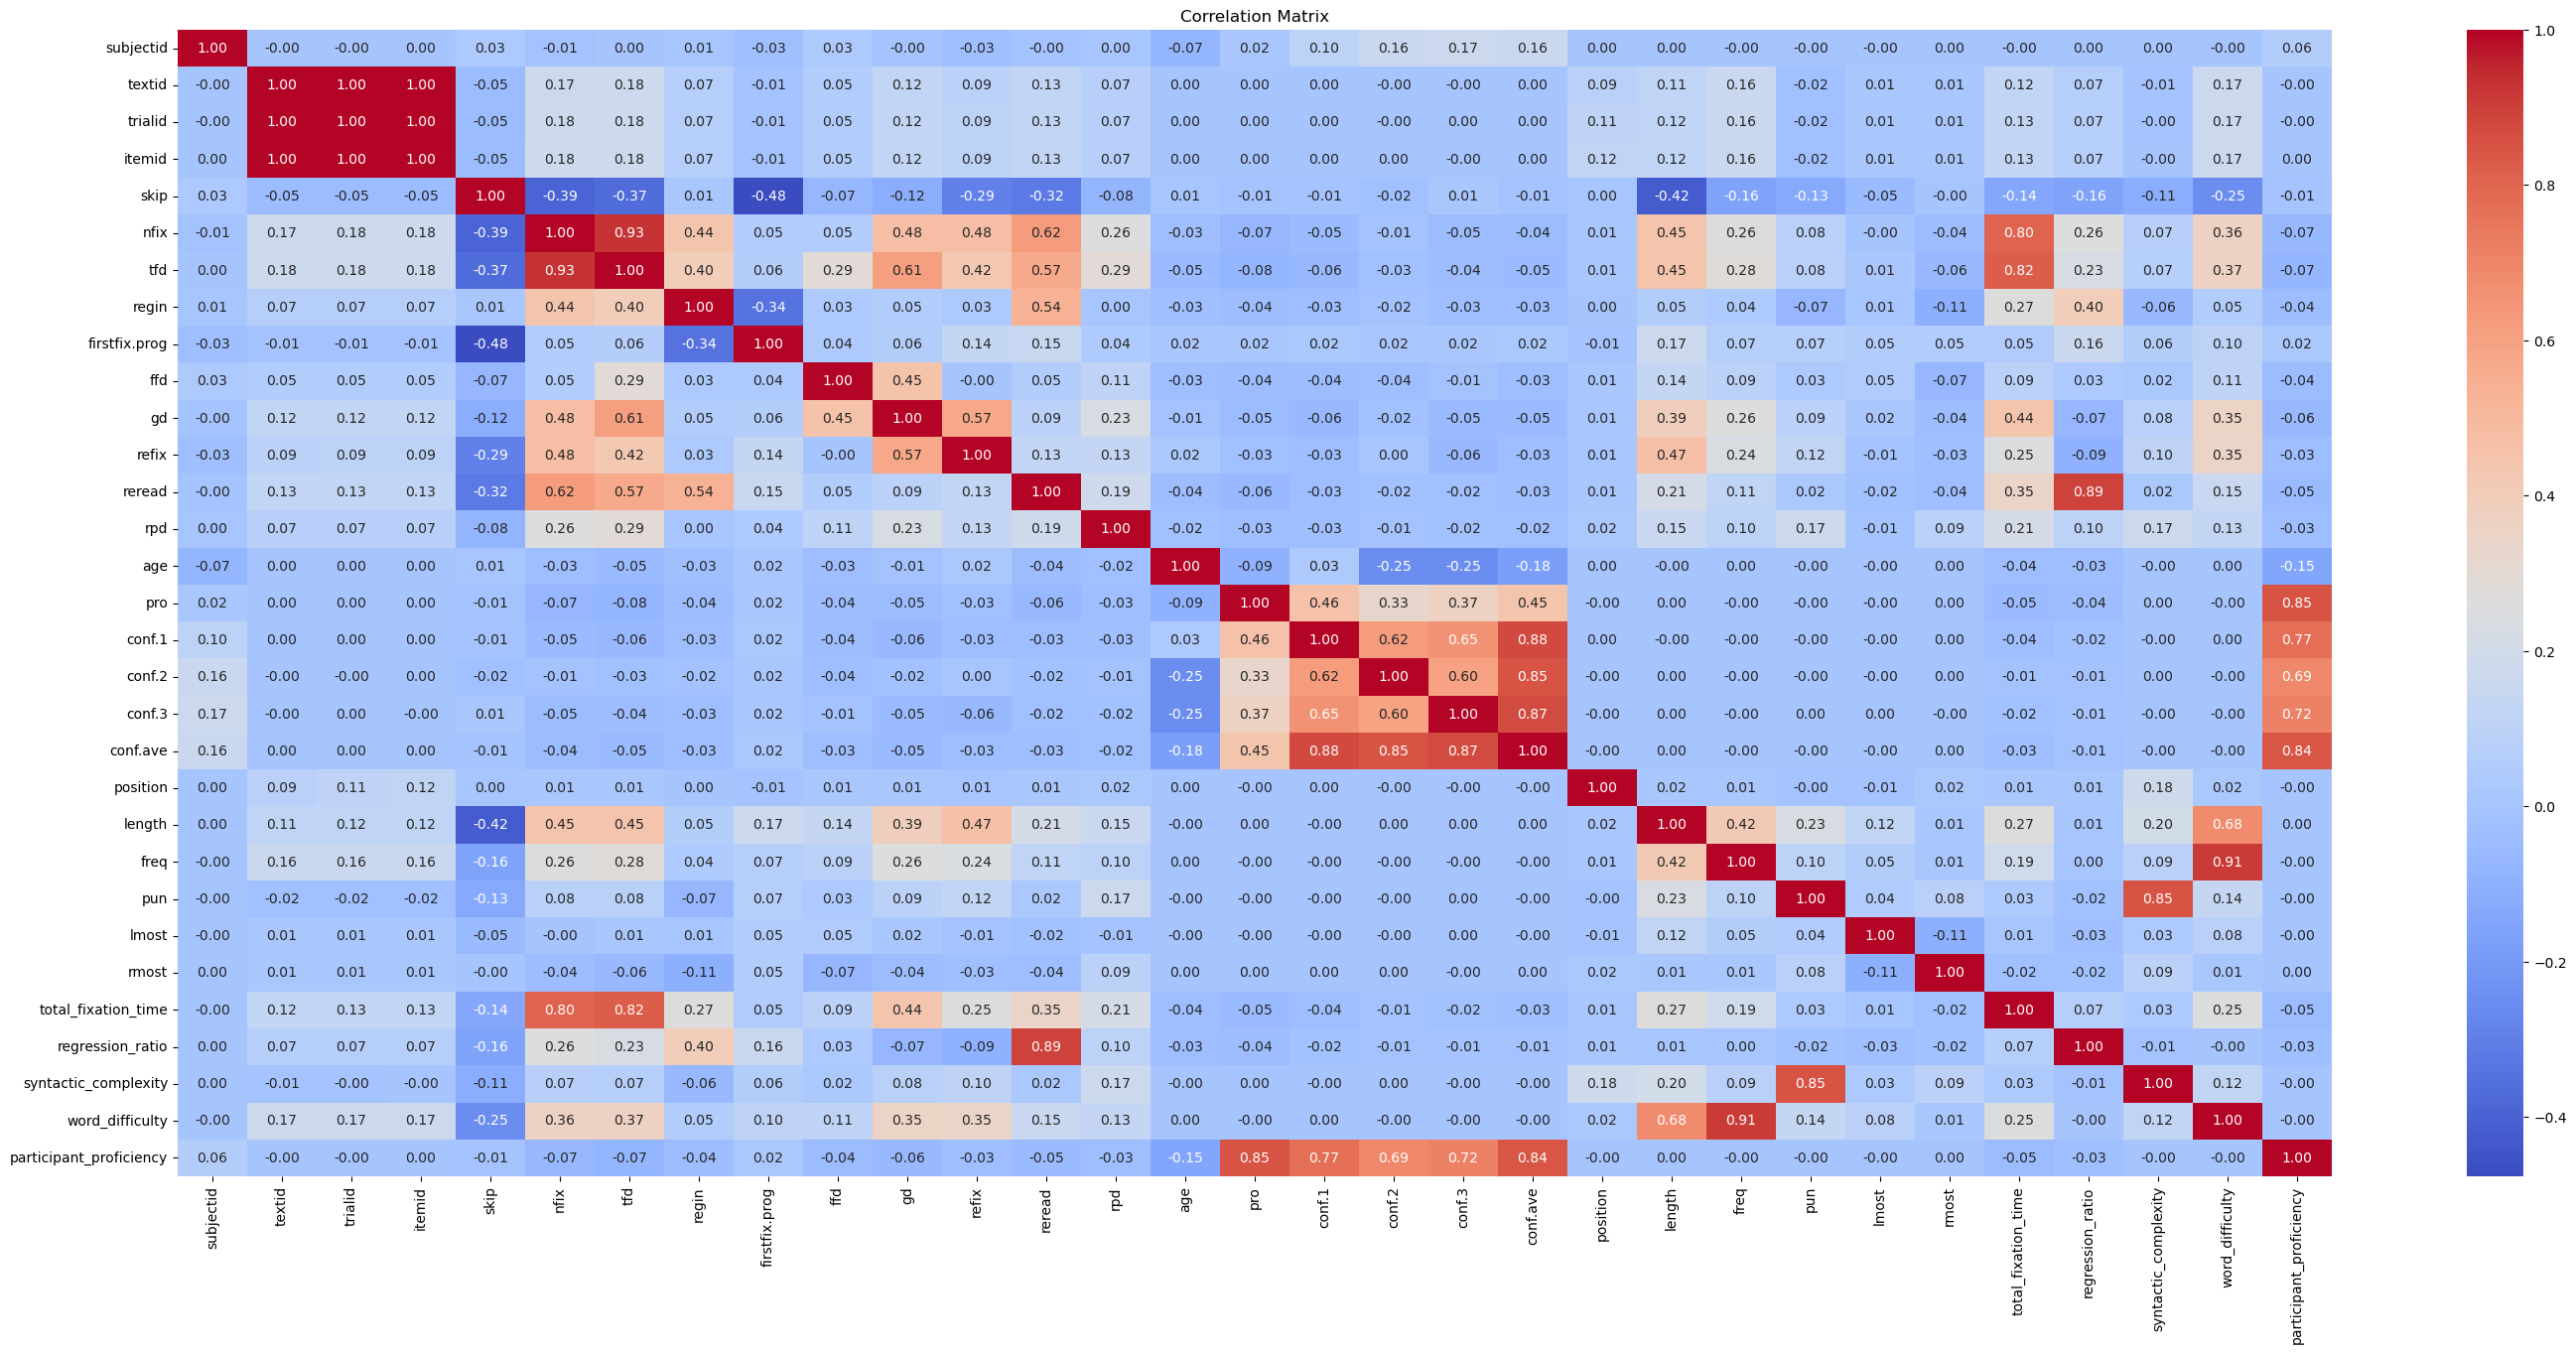

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(35,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [36]:
object_columns = []
int_columns = []

# Iterate through DataFrame columns to sep objects from ints or floats
for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float':
        int_columns.append(col)

num_cols = df[int_columns]

In [37]:
object_columns

['book', 'eiken', 'ia', 'sex']

### Feature Selection

In [38]:
"""Drop all uncorrelated features with the target variable"""

selected_cols = [
 'age',
 'pro',
 'conf.1',
 'conf.2',
 'conf.3',
 'conf.ave',
 'length',
 'freq',
 'total_fixation_time',
 'syntactic_complexity',
 'word_difficulty',
 'participant_proficiency']

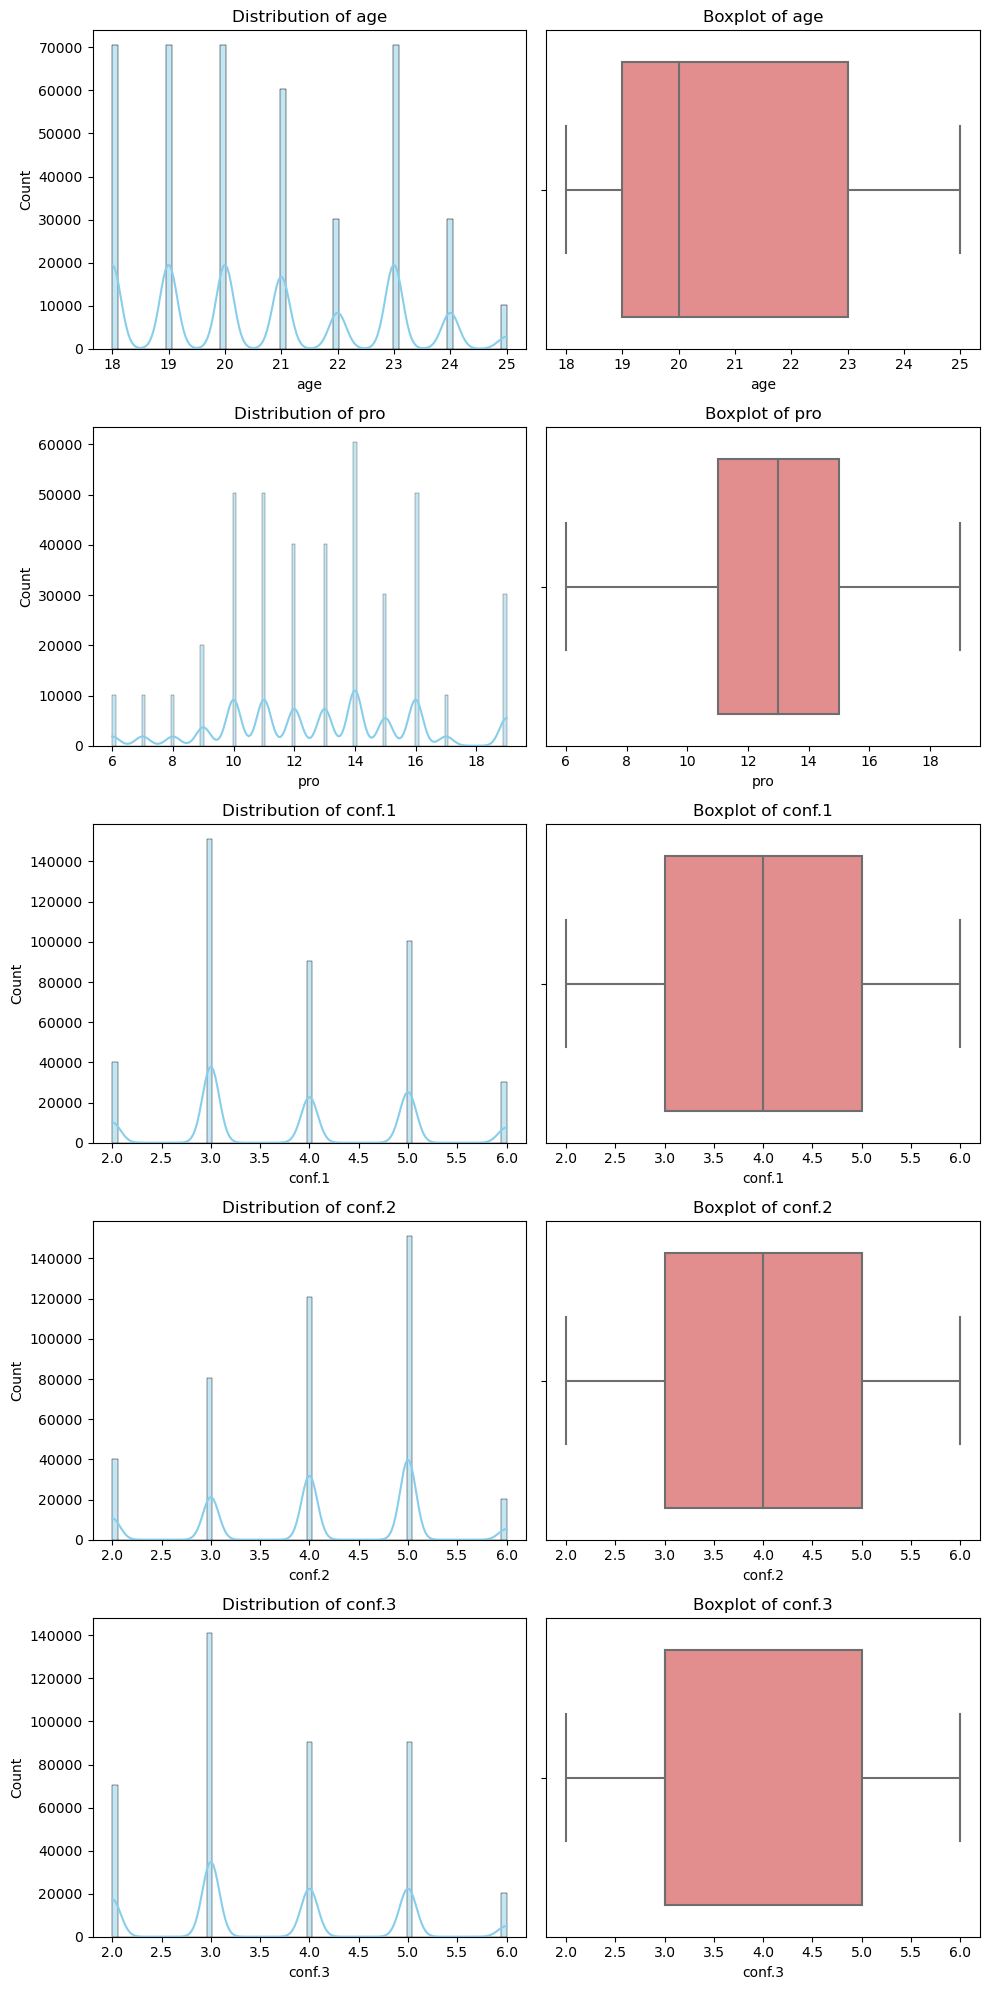

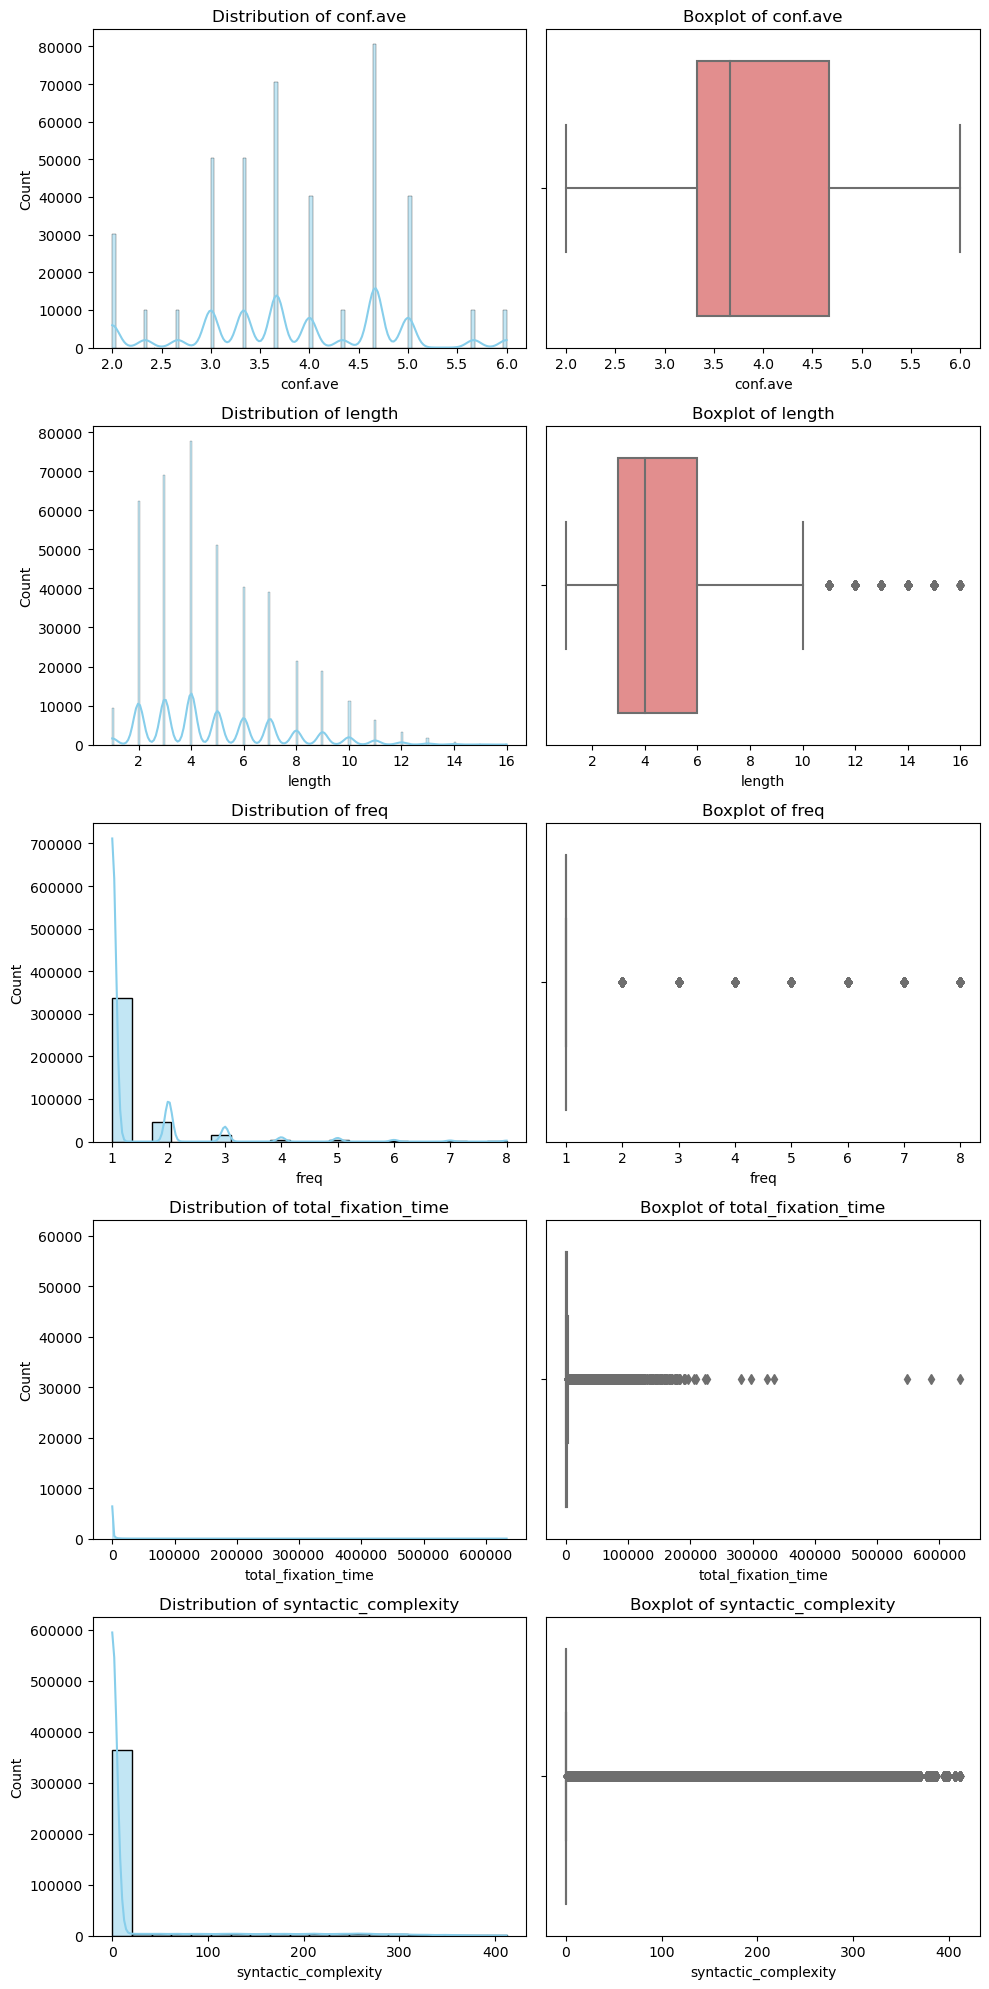

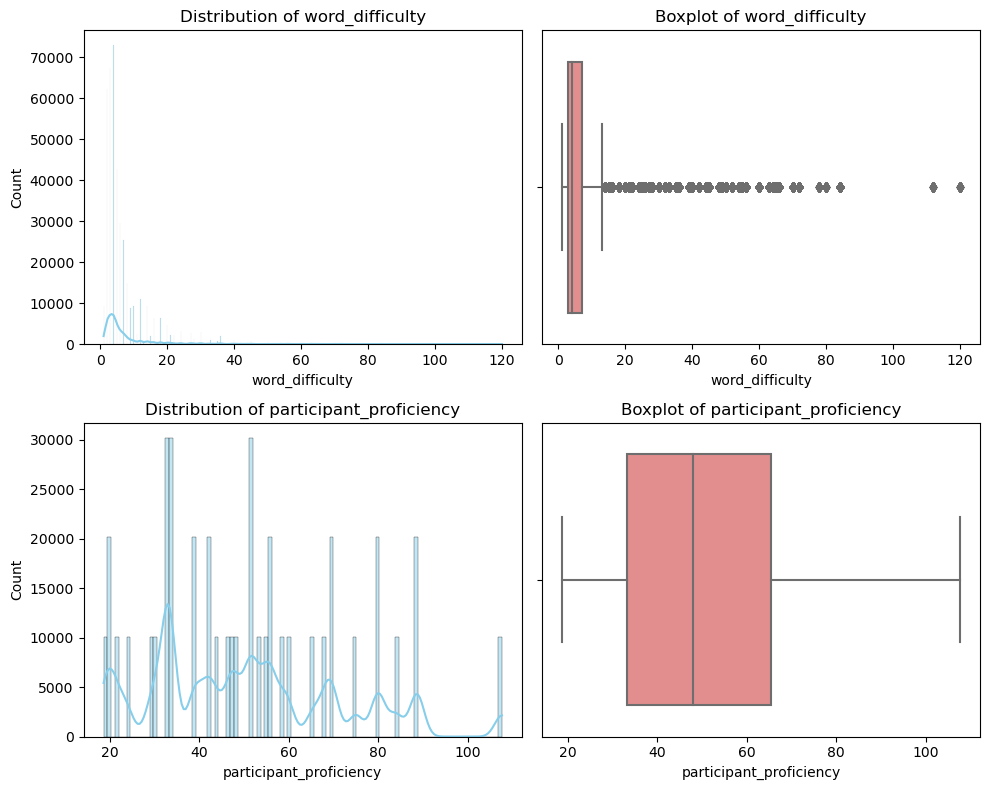

In [39]:
#Identify Outliers and Analysze Distribution

def visualize_skewness_and_outliers(dataframe, columns, batch_size=10):
    # Process in batches
    for batch_start in range(0, len(columns), batch_size):
        # Calculate the end of the current batch
        batch_end = min(batch_start + batch_size, len(columns))
        batch_columns = columns[batch_start:batch_end]
        num_features = len(batch_columns)

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(10, num_features * 4))

        for i, column in enumerate(batch_columns):
            # Plot histogram for skewness
            sns.histplot(dataframe[column], kde=True, ax=axes[i, 0], color='skyblue')
            axes[i, 0].set_title(f'Distribution of {column}')

            # Plot boxplot for outliers
            sns.boxplot(x=dataframe[column], ax=axes[i, 1], color='lightcoral')
            axes[i, 1].set_title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Close empty plots
        gc.collect()  # free up memory

# Call the function
visualize_skewness_and_outliers(df, selected_cols, batch_size=5)


### Implementation of both Semantic Analysis and Syntactic Complexity | comprehensive evaluation & prediction analytics

In [44]:
#We need to make the whole sentence whole to further perform our NLP improvements

"""  Had to reassemble the split words into meaningful sentences and then perform syntactic complexity analysis and semantic analysis to improve NLP tasks. """

full_text = df.groupby('textid')['ia'].apply(lambda words: ' '.join(words)).reset_index()

In [45]:
# Adjust punctuation spacing

full_text['sentence'] = full_text['ia'].str.replace(r'\s+([.,!?])', r'\1')

C:\Users\HP\AppData\Local\Temp\ipykernel_20644\1270352536.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  full_text['sentence'] = full_text['ia'].str.replace(r'\s+([.,!?])', r'\1')


In [50]:
# Print the sentence
print(full_text[['textid', 'sentence']])

    textid                                           sentence
0        1  Many people dream of becoming rich by selling ...
1        2  In wealthy countries like the United States an...
2        3  In Russia, there are sets of dolls called matr...
3        4  The white rhinoceros lives in southern Africa ...
4        5  Nowadays, most towns and cities have firefight...
5        6  The avocado grows on trees in warm countries l...
6        7  Plastic garbage is a problem around the world....
7        8  Flying a plane is a challenging job. Because o...
8        9  In the 1900s, the population of Australia star...
9       10  Many airports are busy places. Travelers hurry...
10      11  Chocolate is one of the most popular foods in ...
11      12  In recent decades, India has been experiencing...
12      13  One problem that many modern societies face is...
13      14  Doctors often need to monitor changes in their...
14      15  Over the last 200 years, people have begun to ...
15      

#### Syntactic Complexity - done to determine the complexity of the structure of the sentence

In [53]:
# Function for syntactic complexity 

"""  What really happened in the Syntactic Complexity Calculation:
[1]Sentence Length: The average number of words per sentence was calculated as a measure of complexity.
[2]Subordinate Clauses: Subordinate clauses were estimated by identifying conjunctions and other sentence-structuring words (e.g., “and,” “because”) using Part-of-Speech (POS) tagging. This was done to add to the complexity score.
[3]POS Tagging: POS tagging was performed to identify the different roles of words (e.g., noun, verb, conjunction), which helped in evaluating sentence structure. 
!!! POS tagging was key in identifying sentence structures and estimating the complexity by tracking different parts of the sentence.
In total: the 3 factors contributed to the calculation of syntactic complexity"""

def calculate_syntactic_complexity(text):
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    
    words = word_tokenize(text)
    num_words = len(words)
    
    avg_sentence_length = num_words / num_sentences
    
    # Part of speech tagging for sentence parsing
    pos_tags = nltk.pos_tag(words)
    
    # Number of subordinate clauses (simplified heuristic by counting subordinating conjunctions)
    num_subordinate_clauses = sum(1 for word, pos in pos_tags if pos in ['IN', 'CC'])
    
    complexity_score = (avg_sentence_length + num_subordinate_clauses) / 2
    return complexity_score


#### Semantic Analysis - done to understand the sentence

In [54]:
"""  Word Sense Disambiguation is a technique in Semantic Analysis and after reconstructing the sentences, word sense disambiguation was performed using NLTK’s Lesk algorithm. 
The Lesk algorithm assigns meanings to words based on the context of the sentence.[1]
WordNet was used to identify synonyms, antonyms, and definitions of words. 
WordNet helped in extracting richer meanings from the sentences.[2] """

# Function for semantic analysis
def semantic_analysis(text):
    words = word_tokenize(text)
    
    # Disambiguating word sense for each word using Lesk algorithm
    senses = []
    for word in words:
        sense = lesk(text, word)  # Word Sense Disambiguation
        if sense:
            senses.append((word, sense.definition()))
    
    return senses

In [55]:
# Apply syntactic complexity and semantic analysis on re-assembled sentences created above...

full_text['syntactic_complexity'] = full_text['sentence'].apply(calculate_syntactic_complexity)
full_text['semantic_analysis'] = full_text['sentence'].apply(semantic_analysis)


In [57]:
print(full_text[['textid', 'sentence', 'syntactic_complexity', 'semantic_analysis']])

    textid                                           sentence  \
0        1  Many people dream of becoming rich by selling ...   
1        2  In wealthy countries like the United States an...   
2        3  In Russia, there are sets of dolls called matr...   
3        4  The white rhinoceros lives in southern Africa ...   
4        5  Nowadays, most towns and cities have firefight...   
5        6  The avocado grows on trees in warm countries l...   
6        7  Plastic garbage is a problem around the world....   
7        8  Flying a plane is a challenging job. Because o...   
8        9  In the 1900s, the population of Australia star...   
9       10  Many airports are busy places. Travelers hurry...   
10      11  Chocolate is one of the most popular foods in ...   
11      12  In recent decades, India has been experiencing...   
12      13  One problem that many modern societies face is...   
13      14  Doctors often need to monitor changes in their...   
14      15  Over the last

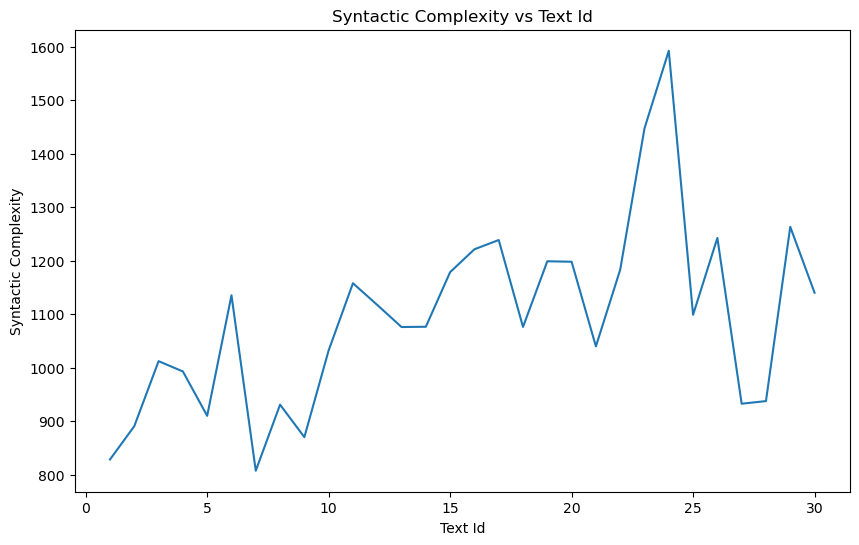

In [58]:
df_nlp = full_text[['textid', 'sentence', 'syntactic_complexity', 'semantic_analysis']]

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='textid', y='syntactic_complexity', data=df_nlp)

# Adding labels and title
plt.xlabel('Text Id')
plt.ylabel('Syntactic Complexity')
plt.title('Syntactic Complexity vs Text Id')

# Show the plot
plt.show()

##### The thing to note from the two immediate implementations above is that
By implementing methods to reconstruct sentences and analyzing their complexity and meaning, we just simply improving natural language processing tasks.<br>
The ability to measure syntactic complexity and accurately assess word meanings helps us achieve basically text understanding which then leads to better performance in various NLP tasks/applications.

In [60]:
def determine_no_of_verbs_syntactic_complexity(words): #no of verb counts
    pos_tags = pos_tag(words)
    complexity = len([word for word, tag in pos_tags if tag.startswith('V')])
    return complexity


def determine_semantic_complexity(words): #determines semantic complexity based on the no of synsets for each word, w/o considering context.
    synsets = [wordnet.synsets(word) for word in words]
    semantic_complexity = sum([len(synset) for synset in synsets if synset]) / len(words)
    return semantic_complexity

In [93]:
grouped = df.groupby(['textid', 'trialid'])

aggregated_data = []


In [94]:
for (textid, trialid), group in grouped:
    words = group['ia'].dropna().tolist()
    if words:
        syn_complexity = determine_no_of_verbs_syntactic_complexity(words)
        sem_complexity = determine_semantic_complexity(words)
        mean_fixation_duration = group['tfd'].mean()
        saccade_length = group['length'].mean()
        skipping_rate = group['skip'].mean()
        regression_rate = group['nfix'].mean()
        #we added our new featured engineered columns...
        regression_ratio = group['regression_ratio'].mean()
        total_fixation_time = group['total_fixation_time'].mean()
        word_difficulty = group['word_difficulty'].mean()

        aggregated_data.append({
            'textid': textid,
            'trialid': trialid,
            'syntactic_complexity': syn_complexity,
            'semantic_complexity': sem_complexity,
            'mean_fixation_duration': mean_fixation_duration,
            'saccade_length': saccade_length,
            'skipping_rate': skipping_rate,
            'regression_rate': regression_rate,
            'regression_ratio': regression_ratio,
            'total_fixation_time': total_fixation_time,
            'word_difficulty': word_difficulty,
        })

agg_df = pd.DataFrame(aggregated_data)

In [95]:
agg_df.isna().sum()

textid                    0
trialid                   0
syntactic_complexity      0
semantic_complexity       0
mean_fixation_duration    0
saccade_length            0
skipping_rate             0
regression_rate           0
regression_ratio          0
total_fixation_time       0
word_difficulty           0
dtype: int64

In [96]:
for i in agg_df.columns:
    agg_df[i].fillna(agg_df[i].mode()[0], inplace=True)
    
agg_df.head()

,textid,trialid,syntactic_complexity,semantic_complexity,mean_fixation_duration,saccade_length,skipping_rate,regression_rate,regression_ratio,total_fixation_time,word_difficulty
0,1,2,410,6.929825,405.098845,4.526316,0.231065,1.718870,0.113676,1265.600770,4.894737
1,1,3,861,6.804878,452.140095,4.804878,0.165973,1.815289,0.110554,1429.050268,8.329268
2,1,4,656,5.800000,350.139168,4.435294,0.232712,1.468580,0.085934,919.070014,7.552941
3,1,5,410,5.241379,342.918699,4.356322,0.256238,1.467340,0.097452,925.800673,4.425287
4,2,7,533,6.139535,343.417470,4.593023,0.250993,1.448383,0.083700,989.505672,5.441860


Text(0.5, 1.0, 'Correlation Matrix')

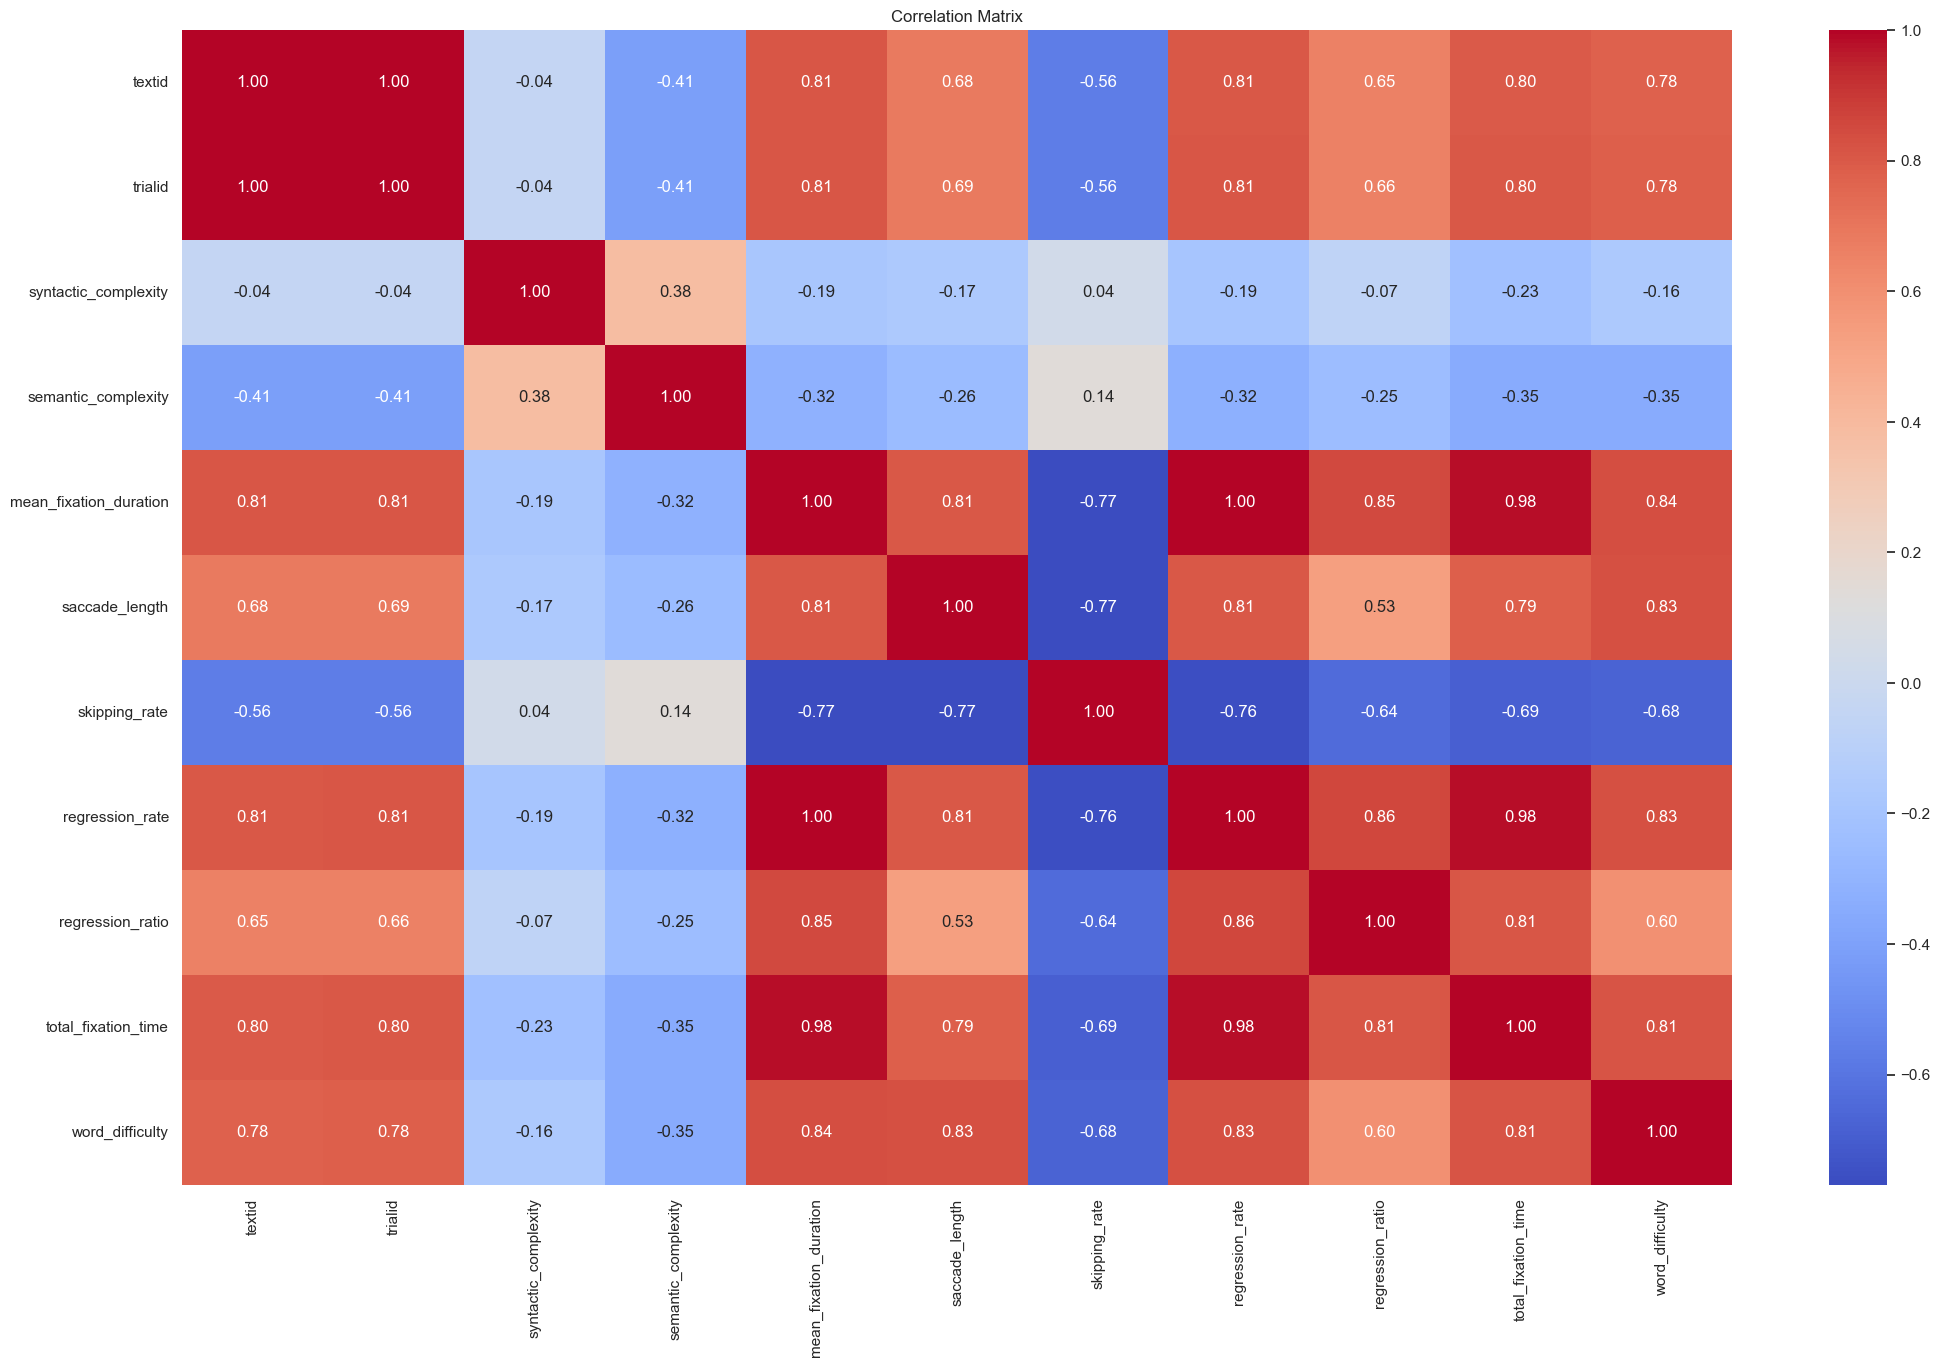

In [97]:
new_corrMatrix = agg_df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(new_corrMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# Model Training

Mean Squared Error: 1.2863942064890719
Root Mean Squared Error: 1.1341931962805418
Mean Absolute Error: 0.8506804852437375


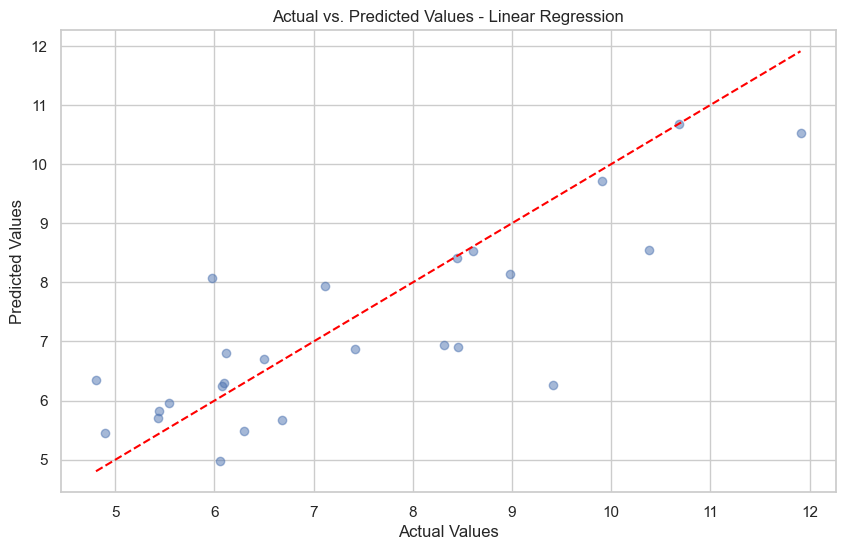

In [99]:
# Train the linear regression model
X = agg_df[['mean_fixation_duration', 'saccade_length', 'skipping_rate', 'regression_rate', 'syntactic_complexity', 'semantic_complexity', 'total_fixation_time', 'regression_ratio']]
y = agg_df['word_difficulty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalise the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#evaluate
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, predictions)
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'Mean Absolute Error: {mae}')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='b')

# Add the y=x line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Linear Regression')
plt.show()

In [100]:
# Random Forest Regressor Model

#Instantiate the Random Forest Model
rfr_model = RandomForestRegressor(random_state=42)

#Train the model with the training dataset
rfr_model.fit(X_train, y_train)

#Make predictions on the test set
rfr_model_pred = rfr_model.predict(X_test)

#Evaluate the model's performance on the dataset
mse_rfr = mean_squared_error(y_test, rfr_model_pred)
mae_rfr = mean_absolute_error(y_test, rfr_model_pred)
rmse_rfr = np.sqrt(mse_rfr)

print(f'Random Forest Regression Evaluation metrics:\n')
print(f"MAE: {mae_rfr}")
print(f"MSE: {mse_rfr}")
print(f"RMSE: {rmse_rfr}")

Random Forest Regression Evaluation metrics:

MAE: 0.9906039981769902
MSE: 1.6353717390805889
RMSE: 1.2788165384763324


# PART II: Improving NLP model with the insight gotten form our prediction

##### Step 1: Identify Key NLP Areas for Improvement
Before integrating insights into NLP models, we need to pinpoint which aspects of semantic analysis and syntactic complexity are most challenging for students based on eye-tracking data.
Semantic Analysis:

What to Improve: Identify words or phrases that cause longer fixation durations, frequent regressions, or rereads. These may include complex vocabulary, ambiguous terms, or polysemous words (words with multiple meanings).
How to Improve: Enhance the NLP model's ability to disambiguate meanings based on context, improve word sense disambiguation, and simplify or clarify complex terms.
Syntactic Complexity:

What to Improve: Focus on sentence structures that lead to higher syntactic complexity scores, as indicated by eye-tracking metrics like total fixation time and regression ratios.
How to Improve: Adjust NLP models to better handle complex sentence structures, possibly by breaking down or simplifying such structures during processing, or providing alternative simpler constructions.
